# Decision Tree

In [2]:
import sys
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

sys.path.append("/home/alvaro/Desktop/MachineLearning/PracticalApplications/1-3/my-staff")
from utils import load_ds

# Cargar dataset

In [5]:
X, y, features_names, class_names = load_ds("univariant")
X.shape

(293, 10)

## Split

In [6]:
from sklearn.model_selection import train_test_split
from globals import TEST_SIZE, SEED

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                y,
                                                                test_size=TEST_SIZE,
                                                                random_state=SEED)

print(len(X_train), len(X_test))

205 88


# hiperparametros

In [8]:
params = {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 16}

# Creación del modelo


In [9]:
clf = DecisionTreeClassifier(random_state=SEED,
                             max_depth=params["max_depth"],
                             max_features=params["max_features"],
                             min_samples_leaf=params["min_samples_leaf"],
                             min_samples_split=params["min_samples_split"])

# Entrenamiento del modelo

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=16, random_state=8)

# Visualización del modelo

In [12]:
from sklearn.tree import plot_tree

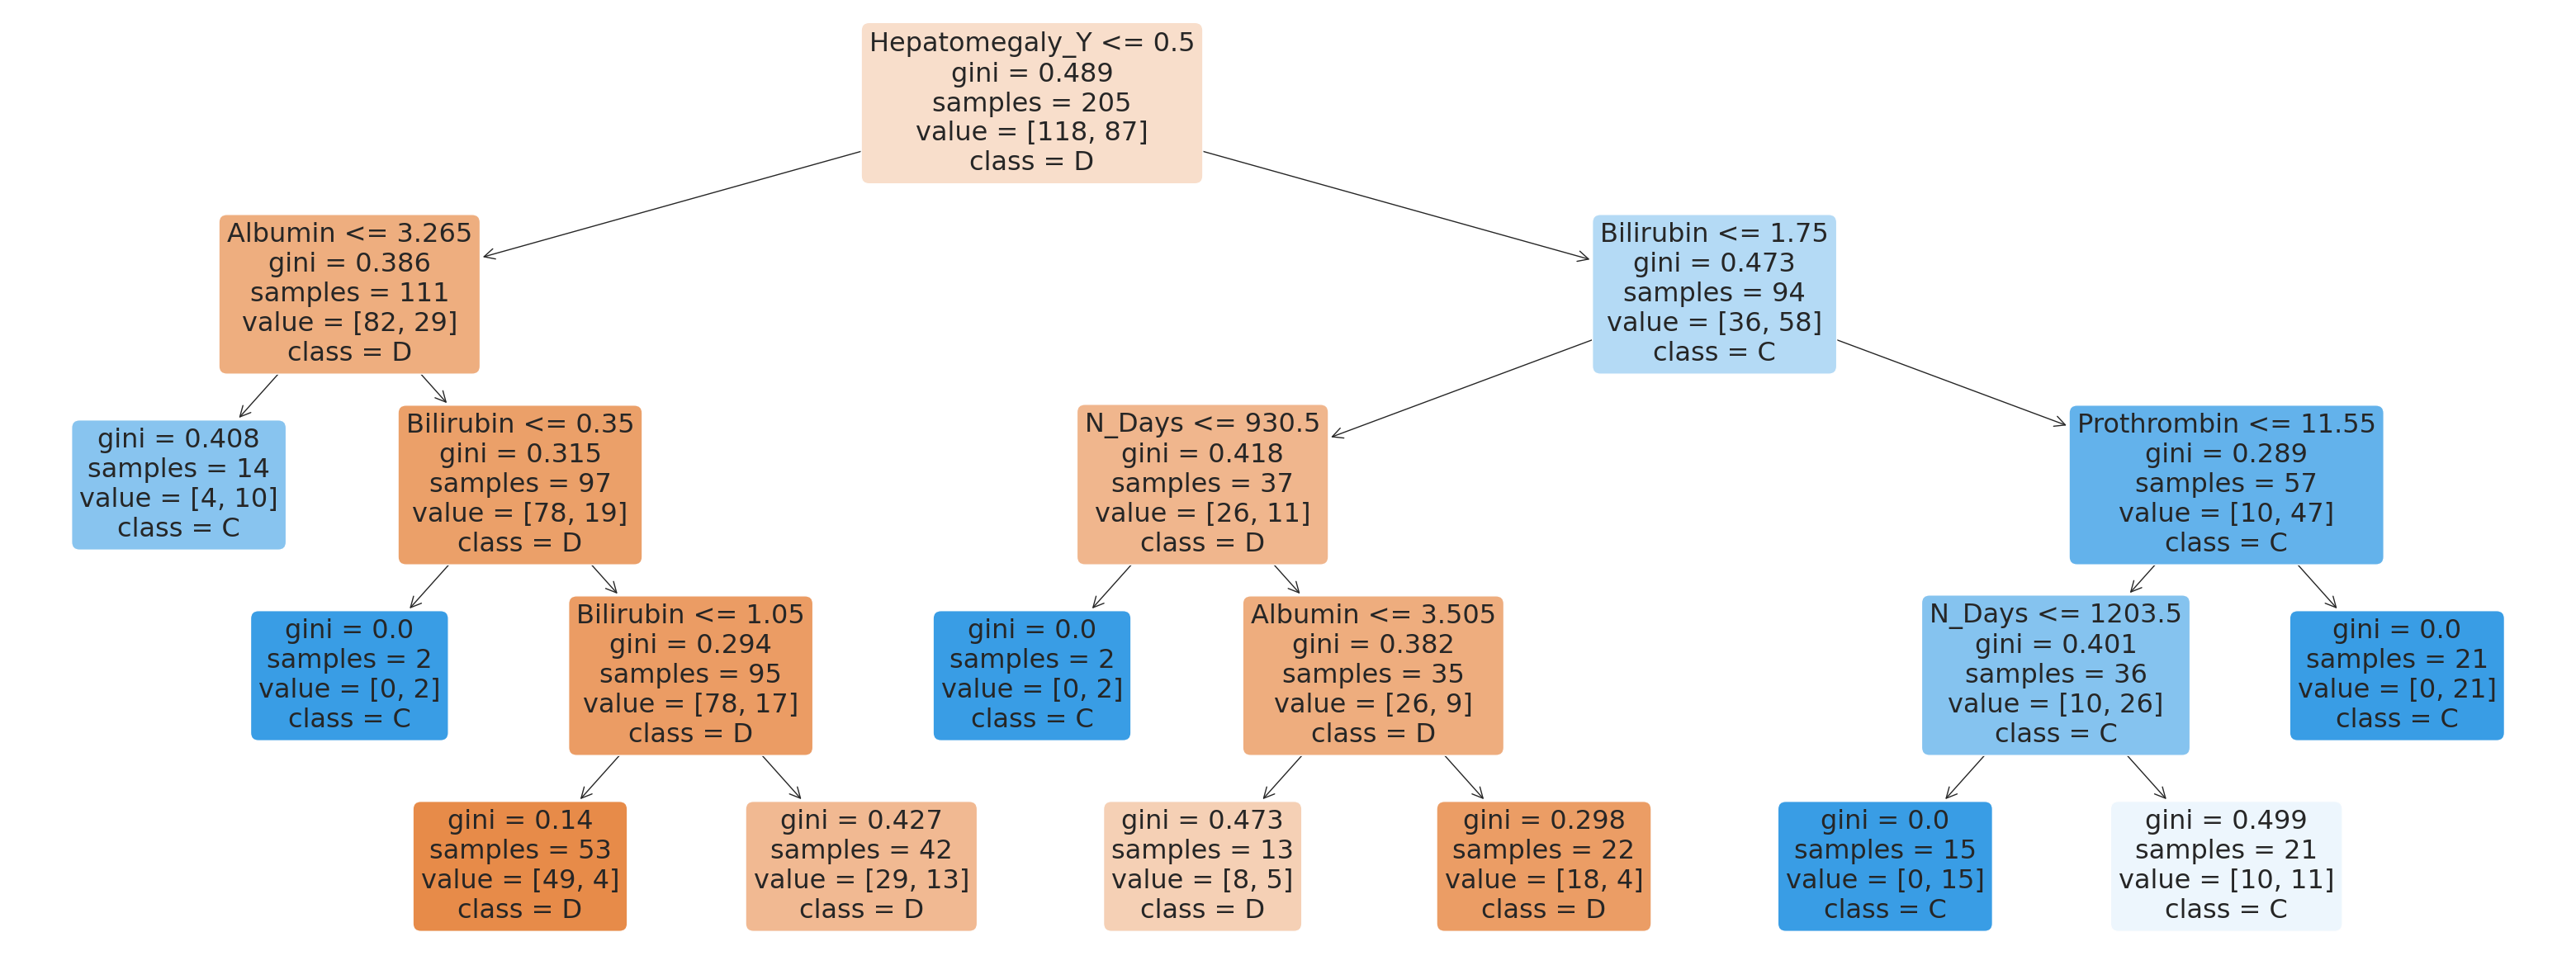

In [13]:
# Pintamos el árbol para sacar conclusiones
plt.figure(figsize=(40, 15))
plot_tree(clf, filled=True, feature_names=features_names, class_names=class_names, rounded=True)
plt.show()

In [14]:
print("Número de nodos en el árbol de decisión:", clf.tree_.node_count)
print("Número de hojas", clf.get_n_leaves())

Número de nodos en el árbol de decisión: 19
Número de hojas 10


# Evaluación del modelo

In [15]:
print("Training score: ", clf.score(X_train, y_train))
print("Test score: ", clf.score(X_test, y_test))

Training score:  0.8048780487804879
Test score:  0.7613636363636364


# Show report

In [16]:
from utils import show_report, eval_model

In [19]:
y_pred = clf.predict(X_test)
show_report(y_test, y_pred)

{'0': {'precision': 0.8085106382978723, 'recall': 0.76, 'f1-score': 0.7835051546391754, 'support': 50.0}, '1': {'precision': 0.7073170731707317, 'recall': 0.7631578947368421, 'f1-score': 0.7341772151898733, 'support': 38.0}, 'accuracy': 0.7613636363636364, 'macro avg': {'precision': 0.7579138557343019, 'recall': 0.7615789473684211, 'f1-score': 0.7588411849145243, 'support': 88.0}, 'weighted avg': {'precision': 0.7648134169929706, 'recall': 0.7613636363636364, 'f1-score': 0.7622044535133404, 'support': 88.0}}
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        50
           1       0.71      0.76      0.73        38

    accuracy                           0.76        88
   macro avg       0.76      0.76      0.76        88
weighted avg       0.76      0.76      0.76        88



In [18]:
eval_model(y_test, y_pred)

Métricas de evaluación:
Precision: 0.7648
Recall: 0.7614
F1-score: 0.7622


# Visualización de características principales

In [27]:
def main_features(clf, feature_names):
    importance = clf.feature_importances_
    # summarize feature importance

    #for i, v in enumerate(importance):
    #    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

    # plot feature importance
    #plt.figure(figsize=(20, 10))

    plt.title('Caracteristicas principales')  # Agregar título al gráfico
    plt.barh([x for x in range(len(importance))], importance, tick_label=feature_names)
    #plt.xticks(rotation=90)
    plt.show()

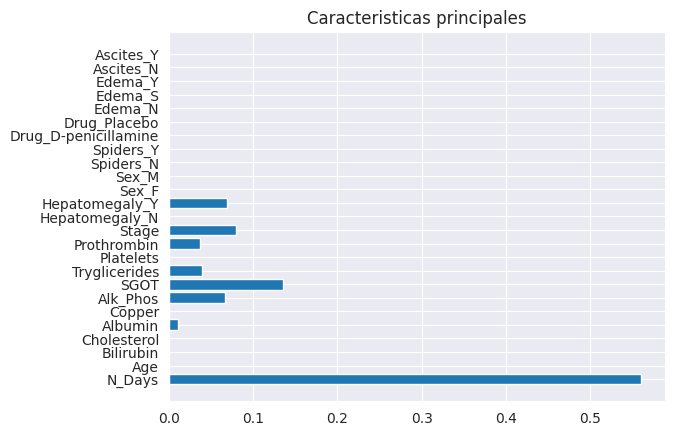

In [18]:
main_features(clf, features_names)